Link to Github Repo: https://github.com/uic-ds-fall2024/class-project-data-ninjas

# Project Introduction

We are analysing [Student Mental Health Dataset](https://www.kaggle.com/datasets/sonia22222/students-mental-health-assessments) which include features:

\\

Stress_Level: The level of stress experienced by the individuals.

Depression_Score: The score representing the level of depression experienced by the individuals.

Anxiety_Score: The score representing the level of anxiety experienced by the individuals.

Sleep_Quality: The quality of sleep experienced by the individuals.

Physical_Activity: The level of physical activity.

Diet_Quality: The quality of the individual's diet.

Social_Support: The level of social support received by the individuals.

Substance_Use: The frequency of substance use such as alcohol, cigarettes or other drugs.

Family_History: Whether the individual has a family history of mental health issues.

Financial_Stress: The level of financial stress experienced by the individuals (between 0 and 5).

Semester_Credit_Load: The number of credits the individual is taking in the semester (15-30).

\\

**Questions we are investigating?**


*   Dependence of student mental health on various factors
*   Does course work have any effect on the stress levels?
*   Which course contributes maximum to the stress level?
*   How much impact does residence type has on a students stress level?
*   CGPA impact on stress level - does low CGPA contribute to high stress?
*   Counselling service used by gender



# Any changes

A discussion whether your scope has changed since the check-in proposal slides. What did you aim to do that you will not do and what have you added to the project? **- No changes**

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
import numpy as np

warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
file_path = '/content/students_mental_health_survey.csv'
data = pd.read_csv(file_path)
print(data.shape)

df = data

(7022, 20)


# Data Cleaning
We dropped the null values as we tried filling them with mean, median and mode and it did not make much of a difference.

In [ ]:
data.dropna(inplace=True)

In [ ]:
cat = data.select_dtypes(include='object')
cat.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,Others,Male,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,Moderate,On-Campus
1,Engineering,Female,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,Low,On-Campus
2,Business,Female,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,High,On-Campus
4,Business,Male,Good,Low,Average,High,Married,Never,Never,No,Yes,High,On-Campus
5,Medical,Female,Good,Moderate,Good,High,Single,Never,Never,No,No,Moderate,Off-Campus


We are doing One-Hot Encoding for the categorical features

In [ ]:
for i in ['Family_History','Chronic_Illness']:
    cat[i] = cat[i].replace({'Yes':1,'No':0})

for i in ['Physical_Activity','Social_Support','Extracurricular_Involvement']:
    cat[i] = cat[i].replace({'Low':1,'Moderate':2,'High':3})

for i in ['Sleep_Quality','Diet_Quality']:
    cat[i] = cat[i].replace({'Poor':1,'Average':2,'Good':3})

for i in ['Substance_Use','Counseling_Service_Use']:
    cat[i] = cat[i].replace({'Never':0,'Occasionally':1,'Frequently':2})

cat['Course']=cat['Course'].map(cat['Course'].value_counts(normalize=True))
cat['Gender'] = cat['Gender'].replace({'Male':1,'Female':0})
cat['Relationship_Status'].value_counts(normalize=True)
cat['Relationship_Status']=cat['Relationship_Status'].map(cat['Relationship_Status'].value_counts(normalize=True))
cat['Residence_Type']=cat['Residence_Type'].map(cat['Residence_Type'].value_counts(normalize=True))
cat.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,0.102073,1,3,2,3,2,0.194996,0,0,0,0,2,0.401001
1,0.152538,0,2,1,2,1,0.509221,1,1,0,0,1,0.401001
2,0.102216,0,3,1,2,2,0.295783,0,1,0,0,3,0.401001
4,0.102216,1,3,1,2,3,0.194996,0,0,0,1,3,0.401001
5,0.299643,0,3,2,3,3,0.509221,0,0,0,0,2,0.396569


In [ ]:
# Scaling the values using MinMaxScaler to scaler everthing from 0 to 1

num = data.select_dtypes(include=np.number)

mmax = MinMaxScaler()

num['Depression_Score'] = num['Depression_Score'].replace({0 :0,1:0, 2:0, 3: 1, 4:1,5:1})

num['Stress_Level'] = num['Stress_Level'].replace({0 :0,1:0, 2:0, 3: 1, 4:1,5:1})

num['Anxiety_Score'] = num['Anxiety_Score'].replace({0 :0,1:0, 2:0, 3: 1, 4:1,5:1})

In [ ]:
data=pd.concat([cat,num],axis=1)
data.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
0,0.102073,1,3,2,3,2,0.194996,0,0,0,0,2,0.401001,25,3.56,1,1,0,2,17
1,0.152538,0,2,1,2,1,0.509221,1,1,0,0,1,0.401001,24,2.44,0,1,0,3,27
2,0.102216,0,3,1,2,2,0.295783,0,1,0,0,3,0.401001,19,3.74,1,0,1,4,15
4,0.102216,1,3,1,2,3,0.194996,0,0,0,1,3,0.401001,18,3.40,1,1,1,0,23
5,0.299643,0,3,2,3,3,0.509221,0,0,0,0,2,0.396569,21,3.35,0,1,1,5,19


In [ ]:
# non-numerical columns are excluded because Z-scores are not meaningful for categorical data
numerical_columns = ['Age', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Financial_Stress', 'Semester_Credit_Load']

# calculating the Z-scores
z_scores = np.abs(stats.zscore(data[numerical_columns]))

# Why threshold of 3?
# 99.7% of the data falls within 3 standard deviations from the mean
# Data points with a Z-score > 3 are flagged as potential outliers
threshold = 3

# Filter rows where Z-scores are less than the threshold
data = data[(z_scores < threshold).all(axis=1)]
z_scores.head()
data.shape

(6956, 20)

In [ ]:
scale=['Sleep_Quality', 'Physical_Activity',
       'Diet_Quality', 'Social_Support','Extracurricular_Involvement','Age', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score',
       'Financial_Stress', 'Semester_Credit_Load']

data[scale] = mmax.fit_transform(data[scale])

In [ ]:
data.describe()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
count,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.00000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000
mean,0.194227,0.505175,0.706153,0.451481,0.501294,0.556714,0.384851,0.215354,0.489074,0.307936,0.04931,0.446377,0.359021,0.309256,0.629617,0.485768,0.443790,0.458309,0.490081,0.500739
std,0.075297,0.500009,0.331950,0.349771,0.313600,0.351105,0.131387,0.533480,0.665270,0.461673,0.21653,0.353273,0.078952,0.236246,0.208543,0.499833,0.496866,0.498295,0.341939,0.311310
min,0.102073,0.000000,0.000000,0.000000,0.000000,0.000000,0.194996,0.000000,0.000000,0.000000,0.00000,0.000000,0.202430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.146104,0.000000,0.500000,0.000000,0.500000,0.500000,0.295783,0.000000,0.000000,0.000000,0.00000,0.000000,0.396569,0.125000,0.481752,0.000000,0.000000,0.000000,0.200000,0.214286
50%,0.152538,1.000000,1.000000,0.500000,0.500000,0.500000,0.509221,0.000000,0.000000,0.000000,0.00000,0.500000,0.396569,0.250000,0.635036,0.000000,0.000000,0.000000,0.400000,0.500000
75%,0.299643,1.000000,1.000000,0.500000,0.500000,1.000000,0.509221,0.000000,1.000000,1.000000,0.00000,0.500000,0.401001,0.437500,0.781022,1.000000,1.000000,1.000000,0.800000,0.785714
max,0.299643,1.000000,1.000000,1.000000,1.000000,1.000000,0.509221,2.000000,2.000000,1.000000,1.00000,1.000000,0.401001,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA

Exploratory data analysis: explain what your data looks like (words are fine, but visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data.

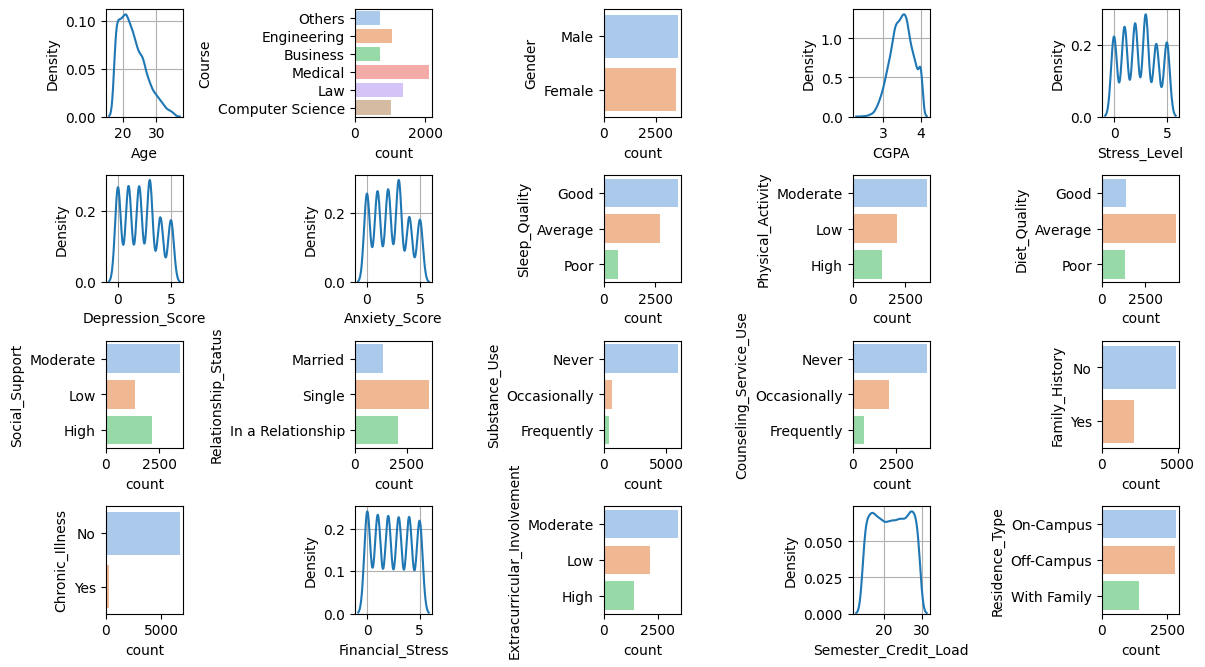

In [ ]:
# Displaying few basic plots to visualize how the data looks like

plt.rcParams['figure.figsize']=[12,8]
r=5
c=5
it=1
for i,j in enumerate(df.columns):
    plt.subplot(r,c,it)
    if df[j].dtype=='object':
        sns.countplot(y=df[j], palette='pastel')
    else:
        sns.kdeplot(df[j], palette='pastel')
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

Plotting a co-relation matrix

We can see that Stress Level v/s Course has the highest co-relation, therby further corroborating our hypotheses

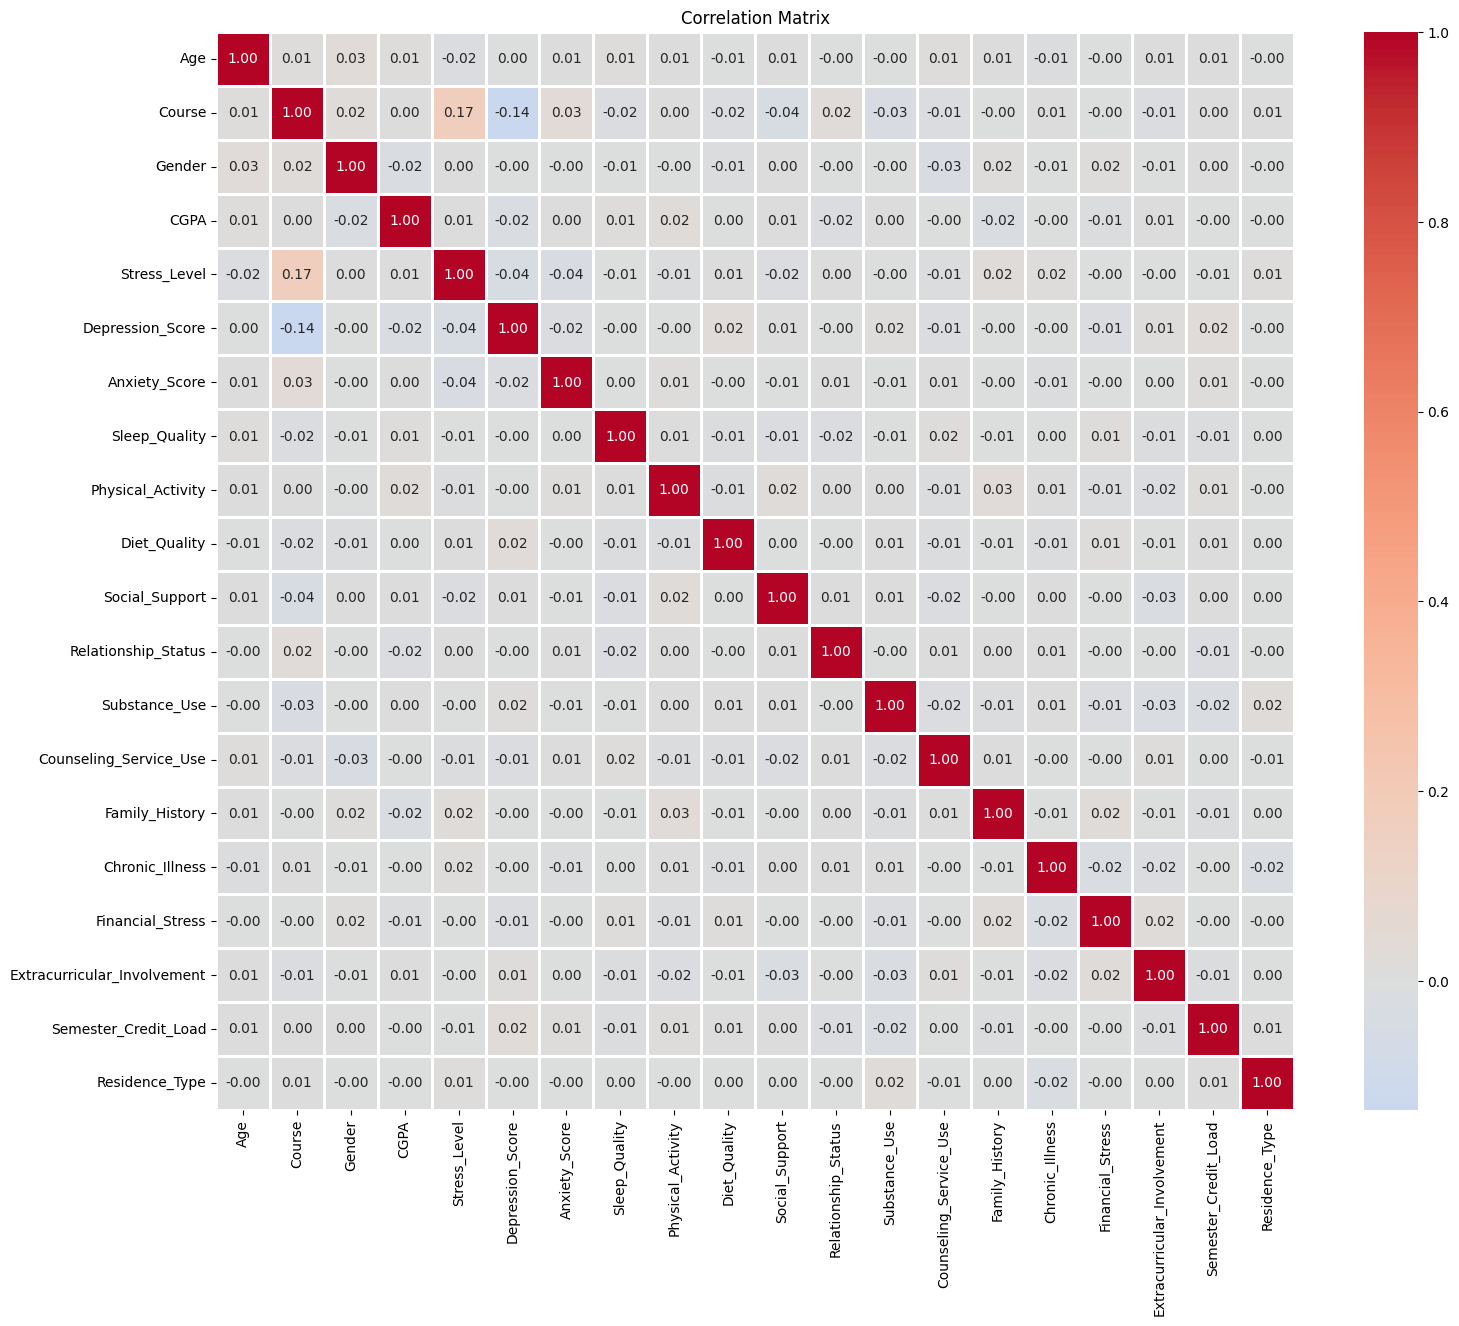

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Course'] = le.fit_transform(df['Course'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Sleep_Quality'] = le.fit_transform(df['Sleep_Quality'])
df['Physical_Activity'] = le.fit_transform(df['Physical_Activity'])
df['Diet_Quality'] = le.fit_transform(df['Diet_Quality'])
df['Social_Support'] = le.fit_transform(df['Social_Support'])
df['Relationship_Status'] = le.fit_transform(df['Relationship_Status'])
df['Substance_Use'] = le.fit_transform(df['Substance_Use'])
df['Counseling_Service_Use'] = le.fit_transform(df['Counseling_Service_Use'])
df['Family_History'] = le.fit_transform(df['Family_History'])
df['Chronic_Illness'] = le.fit_transform(df['Chronic_Illness'])
df['Extracurricular_Involvement'] = le.fit_transform(df['Extracurricular_Involvement'])
df['Residence_Type'] = le.fit_transform(df['Residence_Type'])

corr_matrix = df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, square=True, center=0, linewidths=1, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Separating Categorical and Numerical columns using Point Biserial Correlation for binary categorical and ANOVA for multilevel

import pandas as pd
from scipy.stats import pointbiserialr, f_oneway

df = pd.read_csv('/content/students_mental_health_survey.csv')
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Analyze which categorical columns have binary levels and which have multiple levels
binary_categorical_cols = [col for col in categorical_cols if df[col].nunique() == 2]
multi_level_categorical_cols = [col for col in categorical_cols if df[col].nunique() > 2]

# Output the binary and multi-level categorical columns for exploration
binary_categorical_cols, multi_level_categorical_cols, numerical_cols

# Calculate Point Biserial Correlation for binary categorical vs. numerical columns
import pandas as pd
from scipy.stats import pointbiserialr, f_oneway


point_biserial_results = {}

for cat_col in binary_categorical_cols:
    for num_col in numerical_cols:
        # Convert the categorical binary column to binary integers (e.g., Male/Female -> 0/1)
        binary_encoded = pd.get_dummies(df[cat_col], drop_first=True)

        # Before calculating correlation, remove or replace inf and NaN values
        # Replace inf and -inf with NaN
        binary_data = binary_encoded.squeeze().replace([np.inf, -np.inf], np.nan)
        numerical_data = data[num_col].replace([np.inf, -np.inf], np.nan)

        # Drop rows with NaN values in either column
        valid_data = pd.DataFrame({'binary': binary_data, 'numerical': numerical_data}).dropna()

        # Calculate Point Biserial Correlation using the cleaned data
        correlation, p_value = pointbiserialr(valid_data['binary'], valid_data['numerical'])

        point_biserial_results[(cat_col, num_col)] = {'Correlation': correlation, 'P-Value': p_value}

point_biserial_results

anova_results = {}

# For each multi-level categorical column and each numerical column, perform ANOVA
for cat_col in multi_level_categorical_cols:
    for num_col in numerical_cols:
        # Group numerical values by each level of the categorical variable
        groups = [df[num_col][df[cat_col] == level].dropna() for level in df[cat_col].unique()]
        # Calculate ANOVA
        f_stat, p_value = f_oneway(*groups)
        anova_results[(cat_col, num_col)] = {'F-Statistic': f_stat, 'P-Value': p_value}

anova_results


{('Course', 'Age'): {'F-Statistic': 0.6560707204196194,
  'P-Value': 0.6568608976296753},
 ('Course', 'CGPA'): {'F-Statistic': 0.37300558386551164,
  'P-Value': 0.8674678575577349},
 ('Course', 'Stress_Level'): {'F-Statistic': 153.65182684483898,
  'P-Value': 2.3951212750146984e-155},
 ('Course', 'Depression_Score'): {'F-Statistic': 108.09441648491554,
  'P-Value': 2.6132555051432817e-110},
 ('Course', 'Anxiety_Score'): {'F-Statistic': 123.98441504538857,
  'P-Value': 3.669838144596721e-126},
 ('Course', 'Financial_Stress'): {'F-Statistic': 1.1247019729627301,
  'P-Value': 0.3447045593045292},
 ('Course', 'Semester_Credit_Load'): {'F-Statistic': 0.18960977341737015,
  'P-Value': 0.966635625589367},
 ('Sleep_Quality', 'Age'): {'F-Statistic': 0.46378358309910206,
  'P-Value': 0.6289189152965273},
 ('Sleep_Quality', 'CGPA'): {'F-Statistic': 0.9461635413172245,
  'P-Value': 0.3882771839738135},
 ('Sleep_Quality', 'Stress_Level'): {'F-Statistic': 0.3570645491430105,
  'P-Value': 0.699740038

1. Course and Mental Health Factors
•	Variables such as Stress Level, Depression Score, and Anxiety Score have statistically significant differences across different courses, as indicated by very low p-values and high F-statistics.
•	Interpretation: This suggests that students in different courses might experience varying levels of stress, depression, and anxiety. Some courses might be more demanding or have higher workloads, impacting students' mental health differently. Understanding these variations could inform tailored mental health support or interventions.
2. Physical Activity and Anxiety
•	Physical Activity shows a statistically significant association with Anxiety Score.
•	Interpretation: Different levels of physical activity could be related to students' anxiety levels. Those with higher physical activity may experience lower anxiety, or vice versa. This insight could suggest that encouraging more physical activity among students might help alleviate anxiety symptoms.
3. Diet Quality and Depression
•	Diet Quality has a significant relationship with Depression Score.
•	Interpretation: This implies that students with better diet quality might experience lower levels of depression. It highlights the possible influence of diet on mental health, suggesting that nutrition interventions or education might be beneficial for students facing mental health challenges.
4. Lack of Significant Relationships in Some Cases
•	Many combinations, such as Sleep Quality with most mental health scores, show no statistically significant relationship (p-values > 0.05).
•	Interpretation: For these combinations, we can conclude that there is no strong evidence from this dataset that variables like sleep quality significantly impact mental health scores. This could mean that other factors play a larger role, or that sleep quality variations within this sample are not substantial enough to show an effect.
Overall Conclusions and Insights
•	Stress, Anxiety, and Depression appear to be influenced by academic pressures (such as specific courses) and lifestyle factors (like diet and physical activity).
•	Targeted Interventions: Findings suggest that universities and mental health professionals could consider interventions that address course-specific demands, promote physical activity, and support good nutrition as part of mental health programs for students.
•	Further Exploration: Although significant relationships were found, further studies could explore these associations in more detail to determine causation, as these relationships don’t necessarily imply cause and effect.



# Final Visualisations

The below visualization depicts the CGPA, Stress and Depression levels of students of various courses. We can see that Computer Science students have the highest depression scores while Medical students have the Highest Stress Level

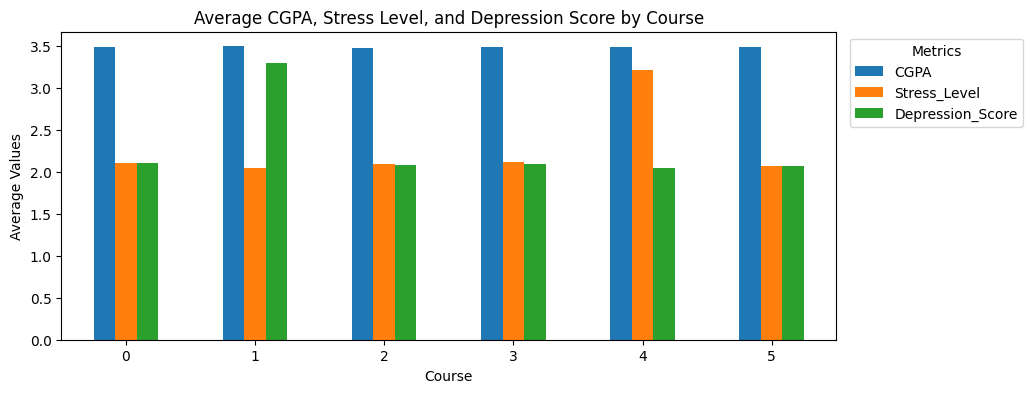

In [ ]:
course_averages = df.groupby('Course')[['CGPA', 'Stress_Level', 'Depression_Score']].mean()
course_averages.plot(kind='bar', figsize=(10, 4))
plt.xticks(rotation=0)
plt.xlabel('Course')
plt.ylabel('Average Values')
plt.title('Average CGPA, Stress Level, and Depression Score by Course')
plt.legend(title='Metrics', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

Assumption 1: Computer Science field would have high stress

Explanation: We expected that Engineering, particularly, computer science field would have high stress, but we were proven incorrect as from the visualisation, Medical field had higher stress level than computer science

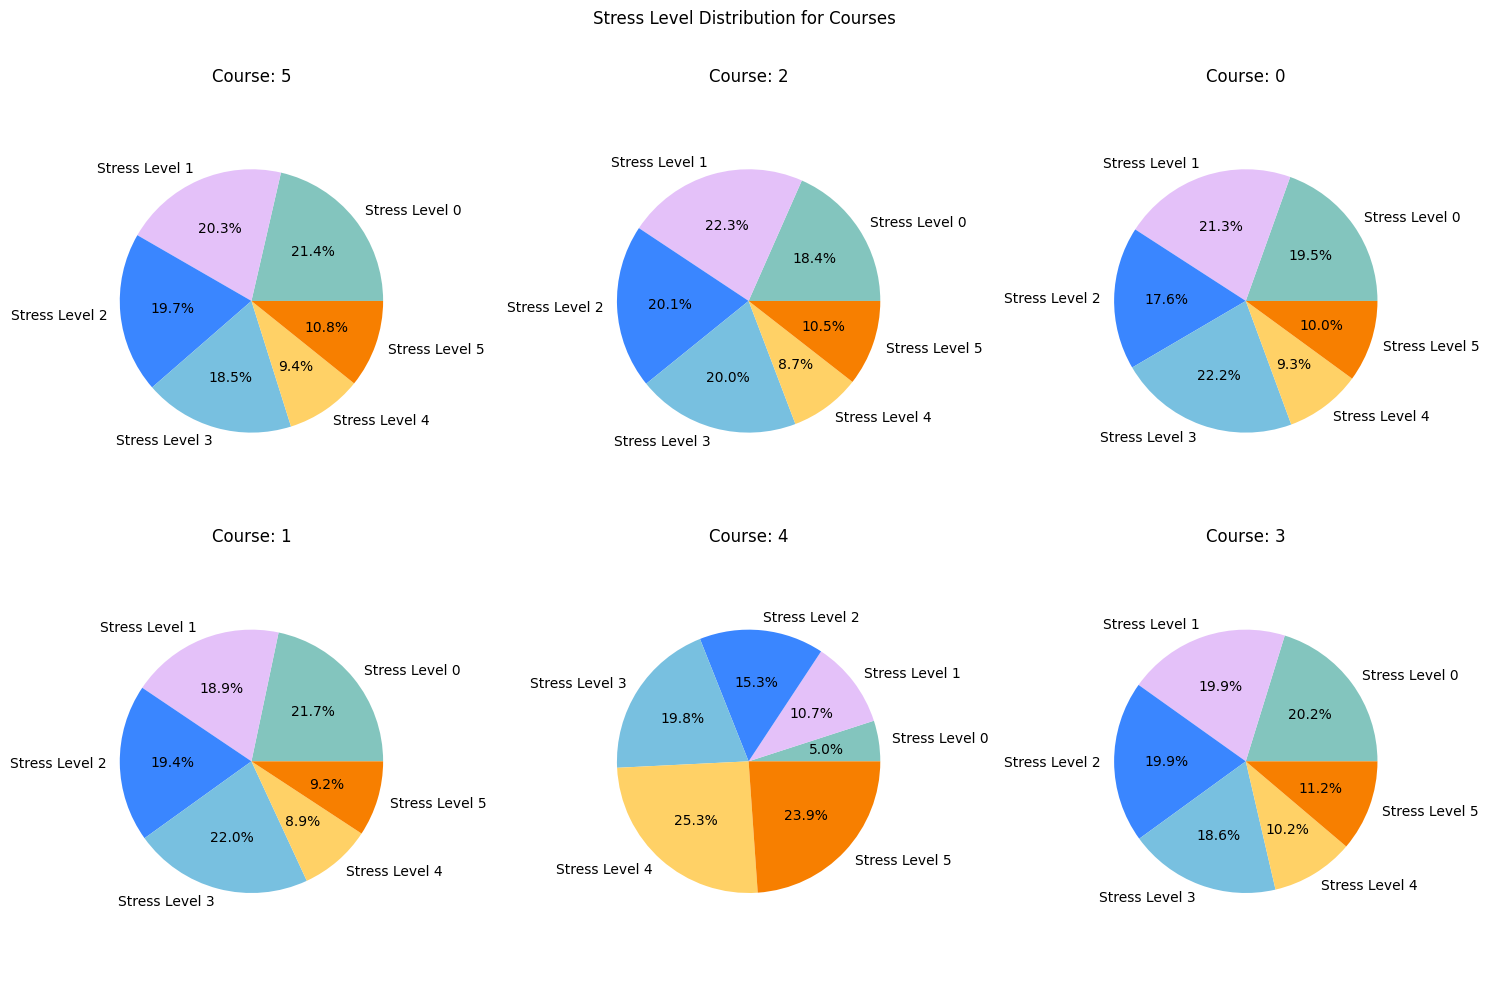

In [ ]:
# Q1 Ans - report
stress_levels = df['Stress_Level'].unique()
num_courses = len(df['Course'].unique())
num_rows = (num_courses - 1) // 3 + 1
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.suptitle('Stress Level Distribution for Courses')

for i, (course, ax) in enumerate(zip(df['Course'].unique(), axes.flatten())):
    course_df = df[df['Course'] == course]

    stress_counts = course_df['Stress_Level'].value_counts()
    # sort stess_counts
    stress_counts = stress_counts.sort_index()

    labels = [f'Stress Level {level}' for level in stress_counts.index]
    sizes = stress_counts.values

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, colors=['#83c5be', '#e4c1f9', '#3a86ff', '#78c0e0', '#ffd166', '#f77f00'])
    ax.axis('equal')
    ax.set_title(f'Course: {course}')

for i in range(num_courses, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

Assumption: We assumed that students having low cgpa and living on-campus to have more stress level

Explanation: We were proven correct and found some interesting points worth noting

People living on campus has higher stress particularly in Medical field.

Interesting point to note was that Students of **"Engineering"** field have **more stress** living **"With Family"**

Students from technical departments with lower CGPA have higher stress levels if they live with their family.

However, all students with lower CGPA who live on-campus instead of living with their family tend to have lower stress levels, except medical students.

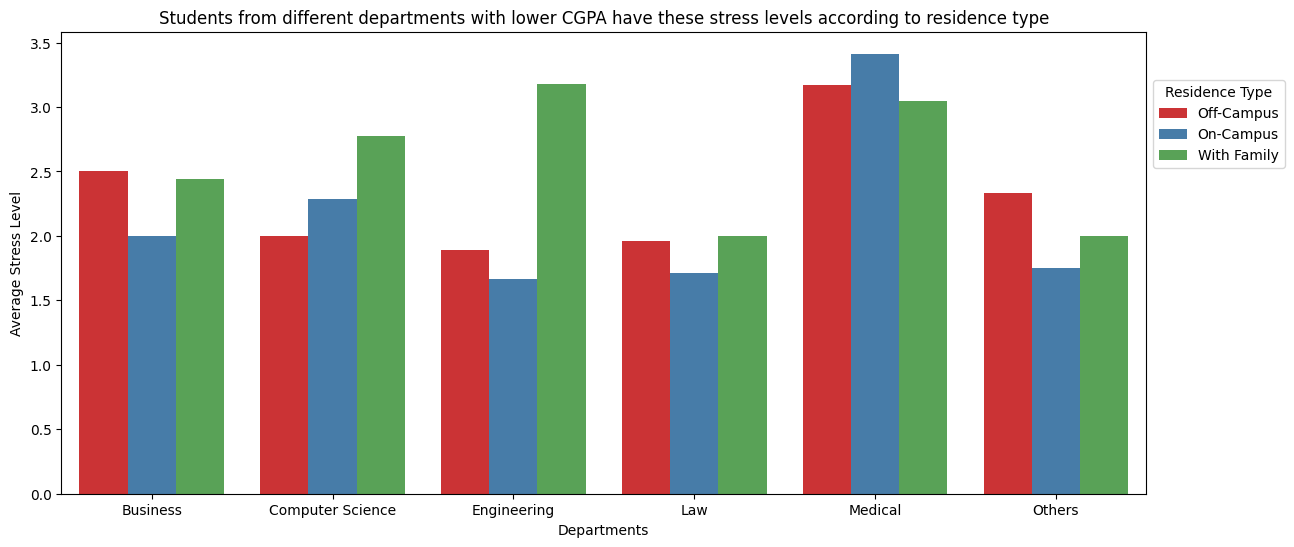

In [ ]:
students_lower_gpa = pd.read_csv(file_path)
plt.rcParams['figure.figsize']=[14,6]
students_lower_gpa["CGPA"] = pd.to_numeric(students_lower_gpa["CGPA"], errors='coerce')
students_lower_gpa = students_lower_gpa.dropna(subset=["CGPA"])

students_lower_gpa =students_lower_gpa[students_lower_gpa["CGPA"] < 3]
students_lower_gpa = students_lower_gpa[["Course", "Stress_Level", "Residence_Type"]].groupby(["Course", "Residence_Type"]).mean().reset_index()

axs = sns.barplot(x = 'Course', y = 'Stress_Level', hue = 'Residence_Type', data = students_lower_gpa, palette="Set1")

axs.set_title("Students from different departments with lower CGPA have these stress levels according to residence type")
axs.set_xlabel("Departments")
axs.set_ylabel('Average Stress Level')
axs.tick_params(axis='x', rotation=0)
axs.legend(loc='center left', bbox_to_anchor=(1, 0.8), title="Residence Type")

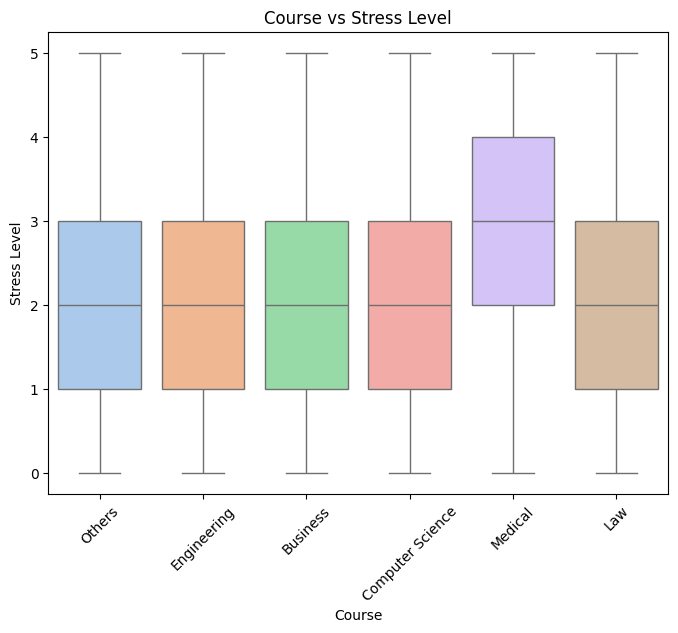

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Course', y='Stress_Level', data=df, palette='pastel')
plt.title('Course vs Stress Level')
plt.xlabel('Course')
plt.ylabel('Stress Level')
plt.xticks(rotation=45)
plt.show()

# Base ML Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = data.drop(["Stress_Level"],axis=1)
y = data["Stress_Level"]

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
predictions=lr_model.predict(X_test)

acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")

print("********* Logistic Regression Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print(classification_report(y_test, predictions))

********* Logistic Regression Results *********
Accuracy    :  0.6336975273145485
Recall      :  0.6336975273145485
Precision   :  0.6387992847017343
              precision    recall  f1-score   support

         0.0       0.62      0.76      0.68       894
         1.0       0.66      0.50      0.57       845

    accuracy                           0.63      1739
   macro avg       0.64      0.63      0.63      1739
weighted avg       0.64      0.63      0.63      1739



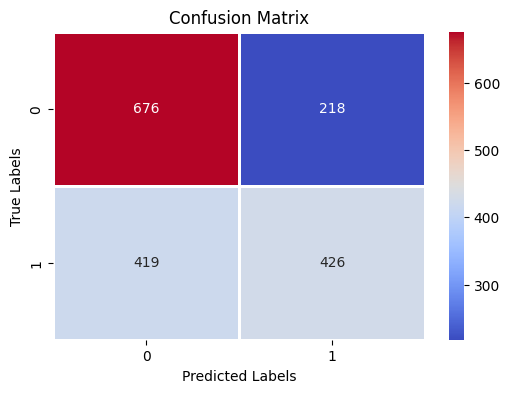

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', linewidth=1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## ML Model 2

Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       894
         1.0       0.65      0.52      0.58       845

    accuracy                           0.63      1739
   macro avg       0.63      0.63      0.62      1739
weighted avg       0.63      0.63      0.63      1739



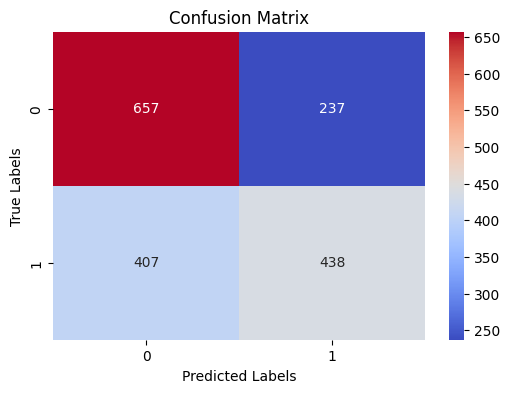

In [ ]:
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier(n_estimators=200, random_state=345)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.77      0.69       894
         1.0       0.67      0.49      0.57       845

    accuracy                           0.64      1739
   macro avg       0.64      0.63      0.63      1739
weighted avg       0.64      0.64      0.63      1739



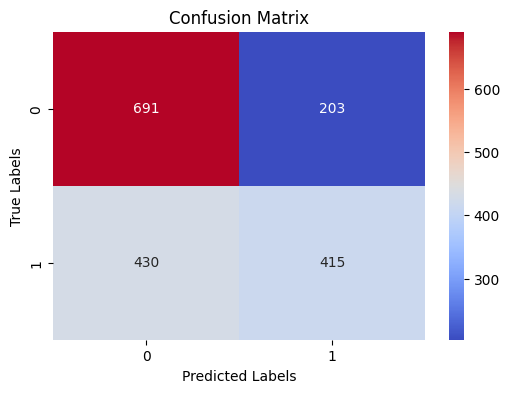

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


SVC = SVC(kernel='poly', degree=2, C=1.2, random_state=123)
SVC.fit(X_train, y_train)

y_pred = SVC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.80      0.69       894
         1.0       0.68      0.46      0.54       845

    accuracy                           0.63      1739
   macro avg       0.64      0.63      0.62      1739
weighted avg       0.64      0.63      0.62      1739



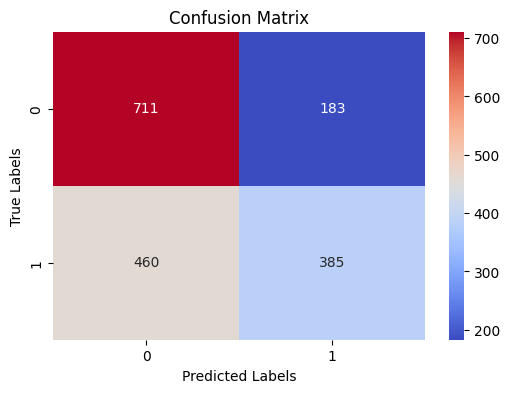

In [ ]:
from sklearn.metrics import confusion_matrix

dt_model = DecisionTreeClassifier(criterion='log_loss', max_depth=4, random_state=234)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Results:

**Baseline ML Model - Logistic Regression**

Calculated Accuracy, Recall, Precision, and F1-score to evaluate performance

Model Performance:\
Accuracy: 62.96%\
Precision: 63.57%\
Recall: 62.96% \
F1-score: 62% \

Insights:
Precision and recall values suggest room for improvement, potentially through feature engineering or hyperparameter tuning.

**Random Forest**

Model Performance:\
Accuracy: 63%\
Precision: 63%\
Recall: 63% \
F1-score: 62%

Insights:
Imbalanced Class Performance: Better at identifying "1" than "0," likely due to class imbalance or feature representation.

**SVM**

Model Performance:\
Accuracy: 64%\
Precision: 64%\
Recall: 63% \
F1-score: 63%

Insights: F1-scores indicate moderate effectiveness, best model in handling imbalanced data.

**Decision Tree**

Model Performance:\
Accuracy: 64%\
Precision: 64%\
Recall: 63% \
F1-score: 62%

Insights: Higher recall for Class 0 suggests the model performs better in identifying "Not At Risk" students.


**Final Analysis**

Key Findings:
Medical Students: Highest stress levels, especially on-campus.
Engineering Students: Higher stress when living with family, but lower stress on-campus.
CGPA and Mental Health:
High CGPA (>3.4): Higher stress and depression.
Moderate CGPA (2.8–3.6): High depression scores.
Low CGPA (<2.8): Lower stress and depression.

ML Models Performance:
Decision Tree & SVC: Accuracy 64%; Random Forest: 61% (due to simple data).
Models biased toward Class 0 predictions; struggled with Class 1 cases.
SVC's similar performance across kernels confirms low data complexity.

Retrospective Project Insight (Evaluation)

Actionable Insights:
High-Stress Groups: Target medical and high-CGPA students with tailored mental health support.
Living Arrangements: Encourage low-CGPA technical students to live on-campus; address on-campus medical student stress.

Challenges Faced:
Class Imbalance: The models struggled with (Class 1) predictions due to the dataset's imbalance.
Limited Data Complexity: The dataset lacked diverse and intricate relationships for more advanced models like Random Forest to leverage.

Future Steps for Improvement:
Addressing Class Imbalance: Use resampling techniques like SMOTE or incorporate class weights to improve recall for (Class 1) cases.
Expanding Data Collection: Include more lifestyle and demographic variables, such as workload, sleep patterns, or social interaction metrics.
Test Advanced Models: Explore Gradient Boosting, Neural Networks, or hybrid approaches to better capture nonlinear patterns



Dummy Lines for PDF printing

Lorem ipsum odor amet, consectetuer adipiscing elit. Semper adipiscing tortor potenti mollis lacus. Per libero accumsan habitant diam diam dui tempor. Velit vitae nibh fermentum neque nulla dapibus eleifend parturient cras. Phasellus primis morbi ullamcorper fames sed lacus facilisis justo. Sit suscipit elementum pellentesque scelerisque finibus hendrerit elit. Habitasse lobortis commodo cubilia cubilia luctus elit volutpat donec. Elit ultrices pellentesque sed auctor magna eget sapien.

Montes donec enim inceptos varius accumsan vestibulum tristique egestas. Turpis nisl egestas porta phasellus parturient velit suspendisse. Elementum urna ultricies auctor a taciti eleifend sed dictumst. Habitasse habitasse posuere parturient dis litora lacinia mollis. Libero morbi luctus, malesuada justo magnis pulvinar netus. Curae sodales consequat varius orci felis cursus. At parturient eros aliquet praesent commodo fusce.

Iaculis netus eget, cubilia quam nisi maecenas. Curabitur tempor malesuada et pretium imperdiet mauris maecenas potenti dolor. Proin litora nostra vestibulum euismod quis, consectetur in. Laoreet adipiscing tincidunt parturient purus cursus varius dapibus. Vitae inceptos vitae consectetur primis bibendum litora litora. Dictum molestie mauris fringilla donec lobortis aptent congue. Ipsum accumsan venenatis pharetra ligula at proin a ridiculus.

Habitant varius ornare suspendisse velit adipiscing sed sapien nec. Ligula ut natoque vestibulum nisi class. Dis convallis sapien ornare conubia vivamus mauris sociosqu duis sapien. Nam taciti at netus maecenas dui; elementum maecenas lacinia. In egestas libero per maecenas non. Maximus leo maximus convallis est netus class integer dis. Ad tristique congue integer quisque sollicitudin lacus tincidunt facilisis. Condimentum class eleifend aliquam senectus congue ornare. Quam nisl accumsan, commodo convallis mauris scelerisque. Elit sit pretium eleifend consequat eu phasellus.

Lorem ipsum odor amet, consectetuer adipiscing elit. Semper adipiscing tortor potenti mollis lacus. Per libero accumsan habitant diam diam dui tempor. Velit vitae nibh fermentum neque nulla dapibus eleifend parturient cras. Phasellus primis morbi ullamcorper fames sed lacus facilisis justo. Sit suscipit elementum pellentesque scelerisque finibus hendrerit elit. Habitasse lobortis commodo cubilia cubilia luctus elit volutpat donec. Elit ultrices pellentesque sed auctor magna eget sapien.

Montes donec enim inceptos varius accumsan vestibulum tristique egestas. Turpis nisl egestas porta phasellus parturient velit suspendisse. Elementum urna ultricies auctor a taciti eleifend sed dictumst. Habitasse habitasse posuere parturient dis litora lacinia mollis. Libero morbi luctus, malesuada justo magnis pulvinar netus. Curae sodales consequat varius orci felis cursus. At parturient eros aliquet praesent commodo fusce.

Iaculis netus eget, cubilia quam nisi maecenas. Curabitur tempor malesuada et pretium imperdiet mauris maecenas potenti dolor. Proin litora nostra vestibulum euismod quis, consectetur in. Laoreet adipiscing tincidunt parturient purus cursus varius dapibus. Vitae inceptos vitae consectetur primis bibendum litora litora. Dictum molestie mauris fringilla donec lobortis aptent congue. Ipsum accumsan venenatis pharetra ligula at proin a ridiculus.

Habitant varius ornare suspendisse velit adipiscing sed sapien nec. Ligula ut natoque vestibulum nisi class. Dis convallis sapien ornare conubia vivamus mauris sociosqu duis sapien. Nam taciti at netus maecenas dui; elementum maecenas lacinia. In egestas libero per maecenas non. Maximus leo maximus convallis est netus class integer dis. Ad tristique congue integer quisque sollicitudin lacus tincidunt facilisis. Condimentum class eleifend aliquam senectus congue ornare. Quam nisl accumsan, commodo convallis mauris scelerisque. Elit sit pretium eleifend consequat eu phasellus.